# Dataset Introduction
***Employee attrition*** refers to <u>the rate at which employees leave a company over a given period of time</u>. High attrition rates can lead to **increased recruitment costs**, **loss of experienced talent**, and **disruption in workflow**. Understanding the factors that contribute to attrition can help organizations create better employee retention strategies.

In this project, we will analyze the **IBM HR Analytics Attrition Dataset**, which contains various employee-related features such as `job role`, `satisfaction level`, `age`, `salary`, and more. By using machine learning techniques, ***we aim to build a predictive model that can estimate the likelihood of an employee leaving the company***.

**Dataset Link:**  
[Kaggle - IBM HR Analytics Attrition Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)  

---
This project aims to:
- **Explore** and **understand** the patterns in the HR dataset.
- **Identify** the key factors that influence employee attrition.
- **Build** and **evaluate** a predictive machine learning model for attrition.

# **Note**: *This project is for educational and exploratory purposes only. In a real-world application, demographic variables which could be found in these kinds of datasets <u>**should be reviewed for fairness implications**</u> before deployment.*


# Importing Dependecies
We import all necessary libraries for data manipulation, visualization and analysis.

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
We import the dataset from Google Drive. We simply connect our colab file to Google Drive by clicking the Drive icon on the navigation bar at the left or by running the code: <br>
*`from google.colab import drive`* <br>
*`drive.mount('/content/drive')`*

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Datasets/HR Employees Attrition/HR-Employee-Attrition.csv')
dataset.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#Dataset Overview

The **IBM HR Analytics Attrition Dataset** contains records of employees along with various demographic, job-related, and performance-related attributes. The data was designed for HR analytics and attrition prediction studies.

- **Total Records:** 1,470 employees  
- **Total Features:** 35 columns (including the target variable `Attrition`)

### Key Components
- **Target Variable:**
  - `Attrition`: Indicates whether an employee has left the company (`Yes` or `No`).

- **Demographic Attributes:**
  - `Age`, `Gender`, `MaritalStatus`, `Education`, `EducationField`.

- **Job-Related Attributes:**
  - `JobRole`, `Department`, `JobLevel`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsWithCurrManager`, `YearsSinceLastPromotion`.

- **Work Environment & Performance:**
  - `OverTime`, `WorkLifeBalance`, `JobSatisfaction`, `EnvironmentSatisfaction`, `PerformanceRating`.

- **Compensation & Benefits:**
  - `MonthlyIncome`, `PercentSalaryHike`, `StockOptionLevel`.

- **Other Factors:**
  - `DistanceFromHome`, `TrainingTimesLastYear`, `NumCompaniesWorked`.

### Data Type Summary
- **Categorical Features:** Job role, department, marital status, overtime, etc.
- **Numerical Features:** Age, monthly income, years at company, etc.

This dataset is **clean** (no missing values) and ready for analysis, making it an excellent choice for classification tasks such as predicting employee attrition.


In [ ]:
print(f'Dataset has {dataset.shape[0]:,} rows and {dataset.shape[1]:,} columns.')
dataset.head(5)

Dataset has 1,470 rows and 35 columns.


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data types and Missing Values
Inspecting column data types and identifying missing values for cleaning and preprocessing.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
dataset.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


## Class Distribution
We check for class imbalance. If class count differ significantly a possible use case scenario for SMOTE might be needed later on to normalize the class distribution.

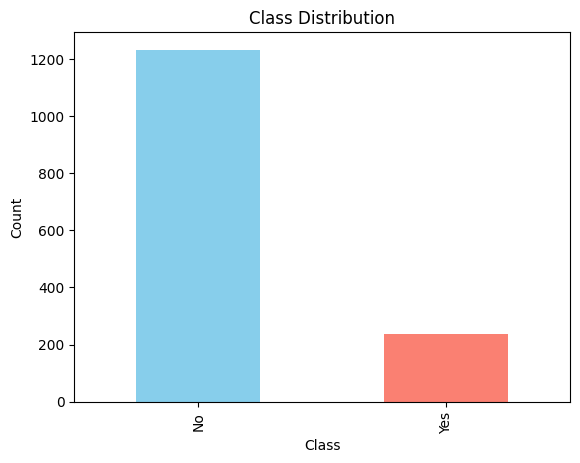

In [ ]:
dataset['Attrition'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Statistical Summary
We use the .describe() method to obtain a statistical summary of the numerical features. This includes measures such as mean, standard deviation, and quartiles, which help assess the central tendency and spread of data.

In [ ]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Unique values for categorical features
Checking different categorical values in each columns. It helps in planning encoding strategies later on in the process.

In [ ]:
categorical_cols = dataset.select_dtypes(include=['object']).columns
print(f'There are {len(categorical_cols)} categorical columns in the dataset.\n')
for col in categorical_cols:
  print(f'{col}: {dataset[col].unique()}\n')

There are 9 categorical columns in the dataset.

Attrition: ['Yes' 'No']

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department: ['Sales' 'Research & Development' 'Human Resources']

EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender: ['Female' 'Male']

JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus: ['Single' 'Married' 'Divorced']

Over18: ['Y']

OverTime: ['Yes' 'No']



# Exploratory Data Analysis

## Univariate Analysis

Univariate analysis focuses on examining **one feature at a time** to understand its distribution, range, and general characteristics without considering other variables.  

This step is important because it helps to:
- Identify data patterns and distribution shapes (normal, skewed, uniform, etc.).
- Spot unusual values or outliers that may require further attention.
- Understand the scale and variability of numerical features.
- Detect imbalanced categories in categorical variables, which could impact model training.

In this dataset, univariate analysis will be applied to:
- **Numerical Features** → Histograms, KDE plots, and boxplots.
- **Categorical Features** → Bar charts showing category frequencies.

These insights provide a foundation for later stages of the analysis, such as correlation checks and bivariate comparisons with the target variable.


### Numerical Feature Distribution
The dataset contains a significant number of numerical variables, such as `Age`, `MonthlyIncome`, `YearsAtCompany`, and `DistanceFromHome`.  
Examining the distribution of these features is an essential first step in **Exploratory Data Analysis (EDA)** for several reasons:

- **Understanding Data Patterns:** Helps reveal the general shape (normal, skewed, uniform, etc.) of the data for each numerical feature.
- **Identifying Outliers:** Extreme values can affect model performance, especially for distance-based algorithms.
- **Spotting Data Entry Issues:** Unusual spikes or unrealistic values may indicate errors.
- **Guiding Preprocessing:** Knowing the distribution helps decide whether transformations (e.g., log scaling) or normalization are needed.

By visualizing these distributions, we can gain an initial sense of the data’s range, spread, and potential problem areas before moving into more complex analysis.

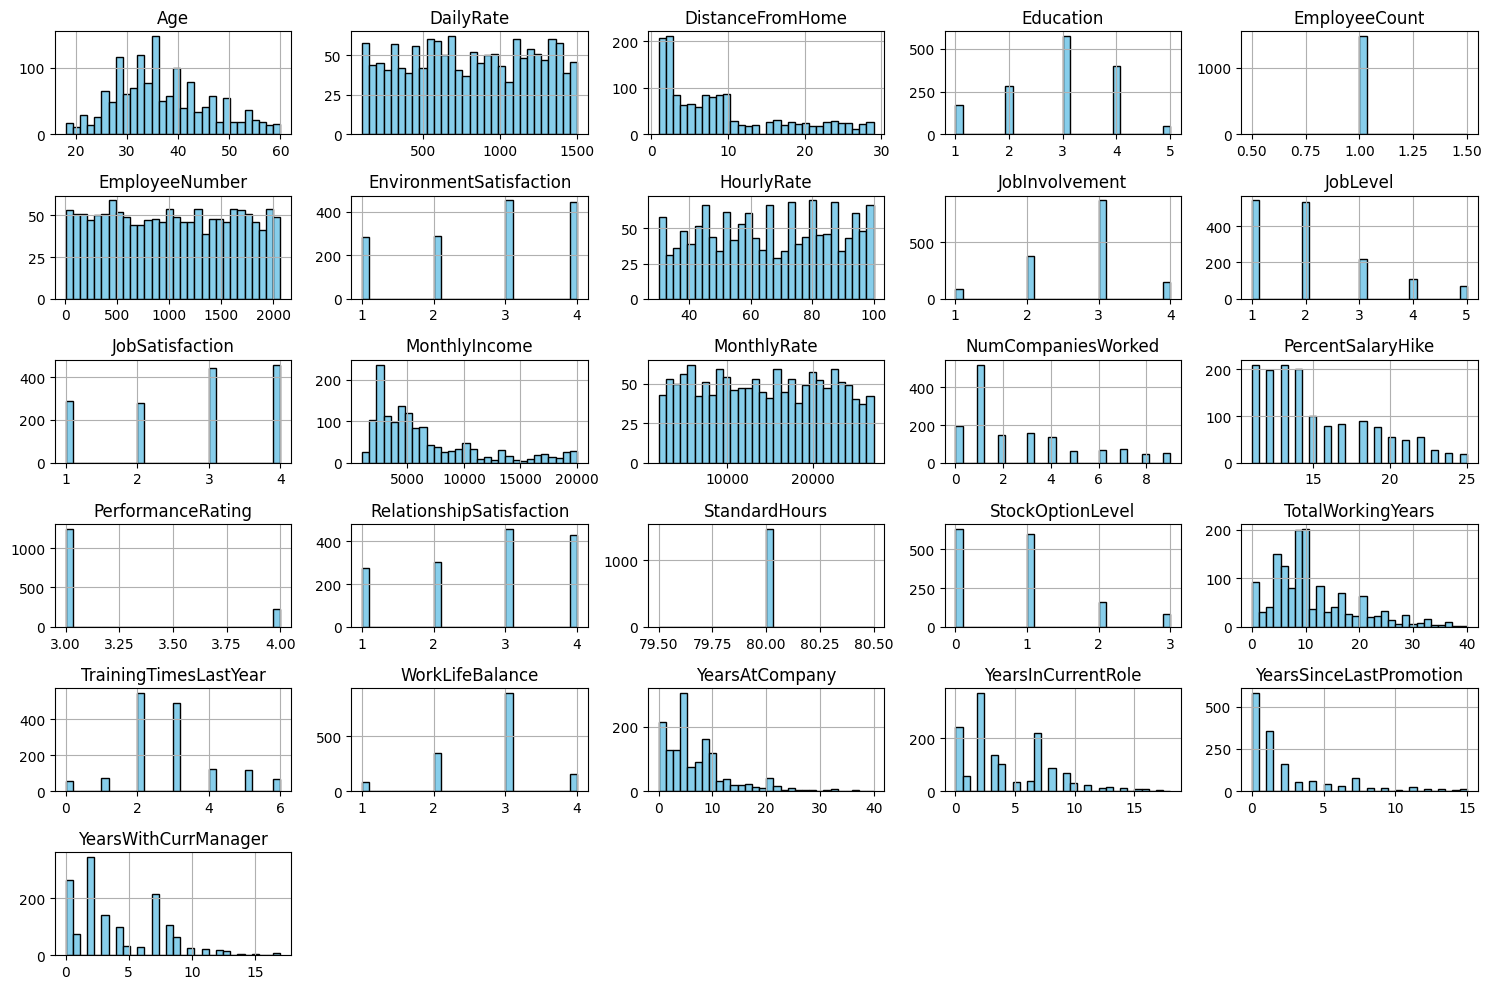

In [ ]:
numerical_cols = dataset.select_dtypes(include=['int64','float64']).columns
dataset[numerical_cols].hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

### Categorical Feature Distribution

Categorical variables such as `JobRole`, `Department`, `MaritalStatus`, and `OverTime` provide insights into employee demographics and work arrangements.  
Exploring these distributions is important because:

- It shows the frequency of each category in the dataset.
- It helps identify imbalanced categories that could bias the model.
- It provides context for later comparisons with attrition.

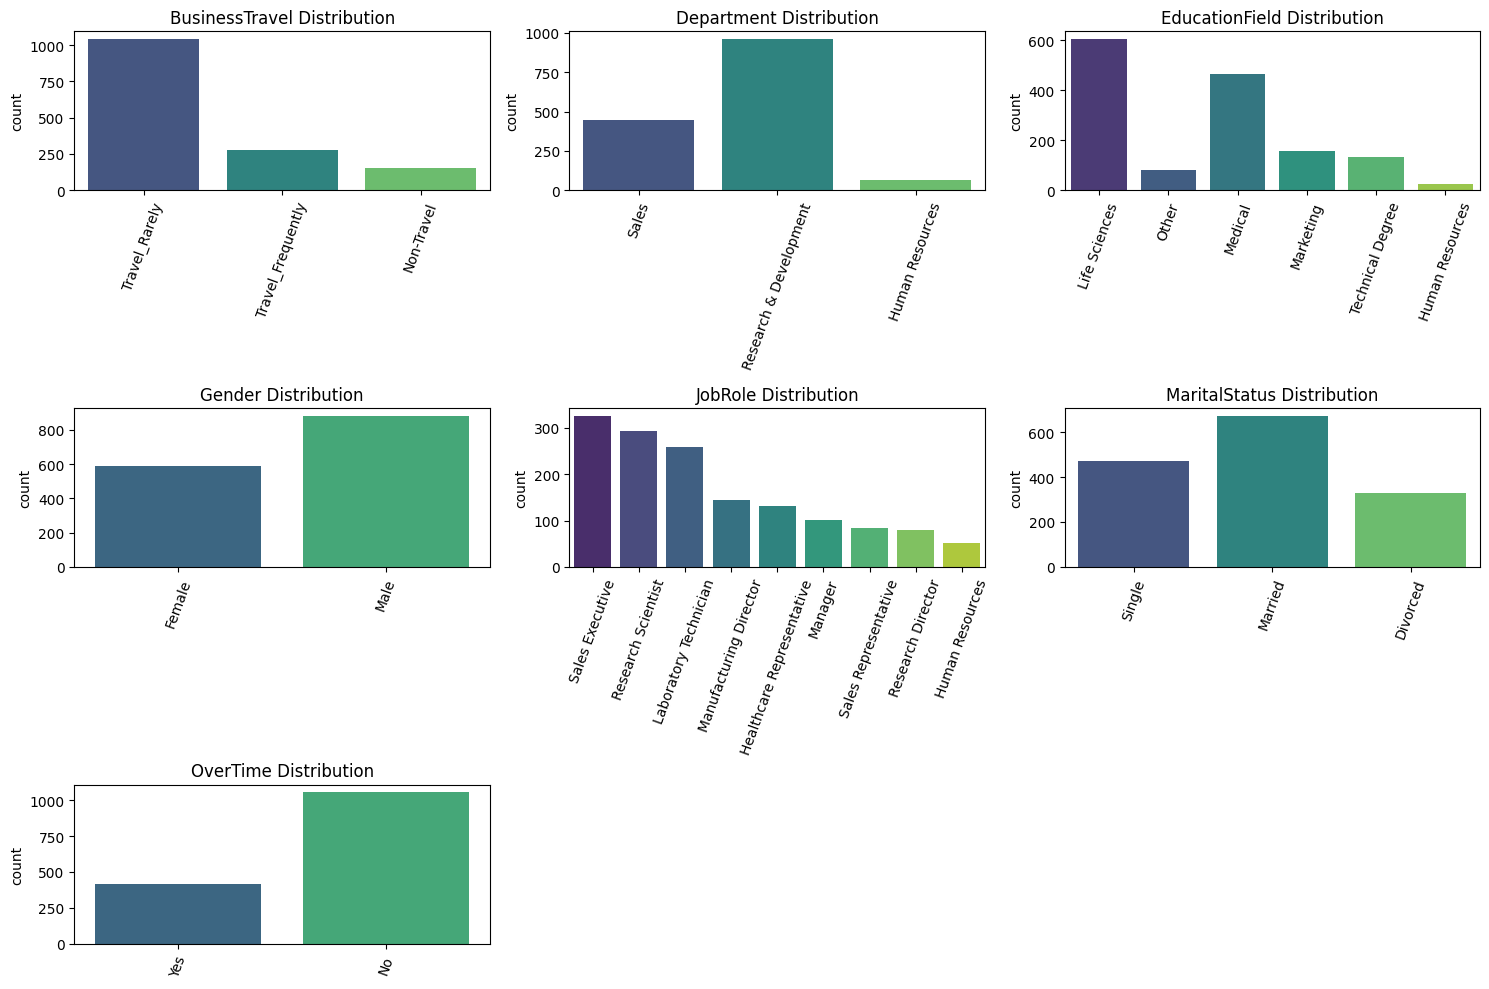

In [ ]:
cat_cols = ['BusinessTravel', 'Department', 'EducationField',
            'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=dataset, x=col, palette='viridis', hue=col, legend=False)
    plt.title(f'{col} Distribution')
    plt.xlabel('')
    plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

## Bivariate Analysis

Bivariate analysis examines the relationship between two variables at a time.  
Here, we will study how each numerical and categorical feature varies with **`Attrition`**. This step helps us:

- Identify features that show different patterns between employees who left and those who stayed.
- Detect potential predictors of attrition early on.
- Understand how certain factors (e.g., overtime, income, years of service) relate to employee turnover.



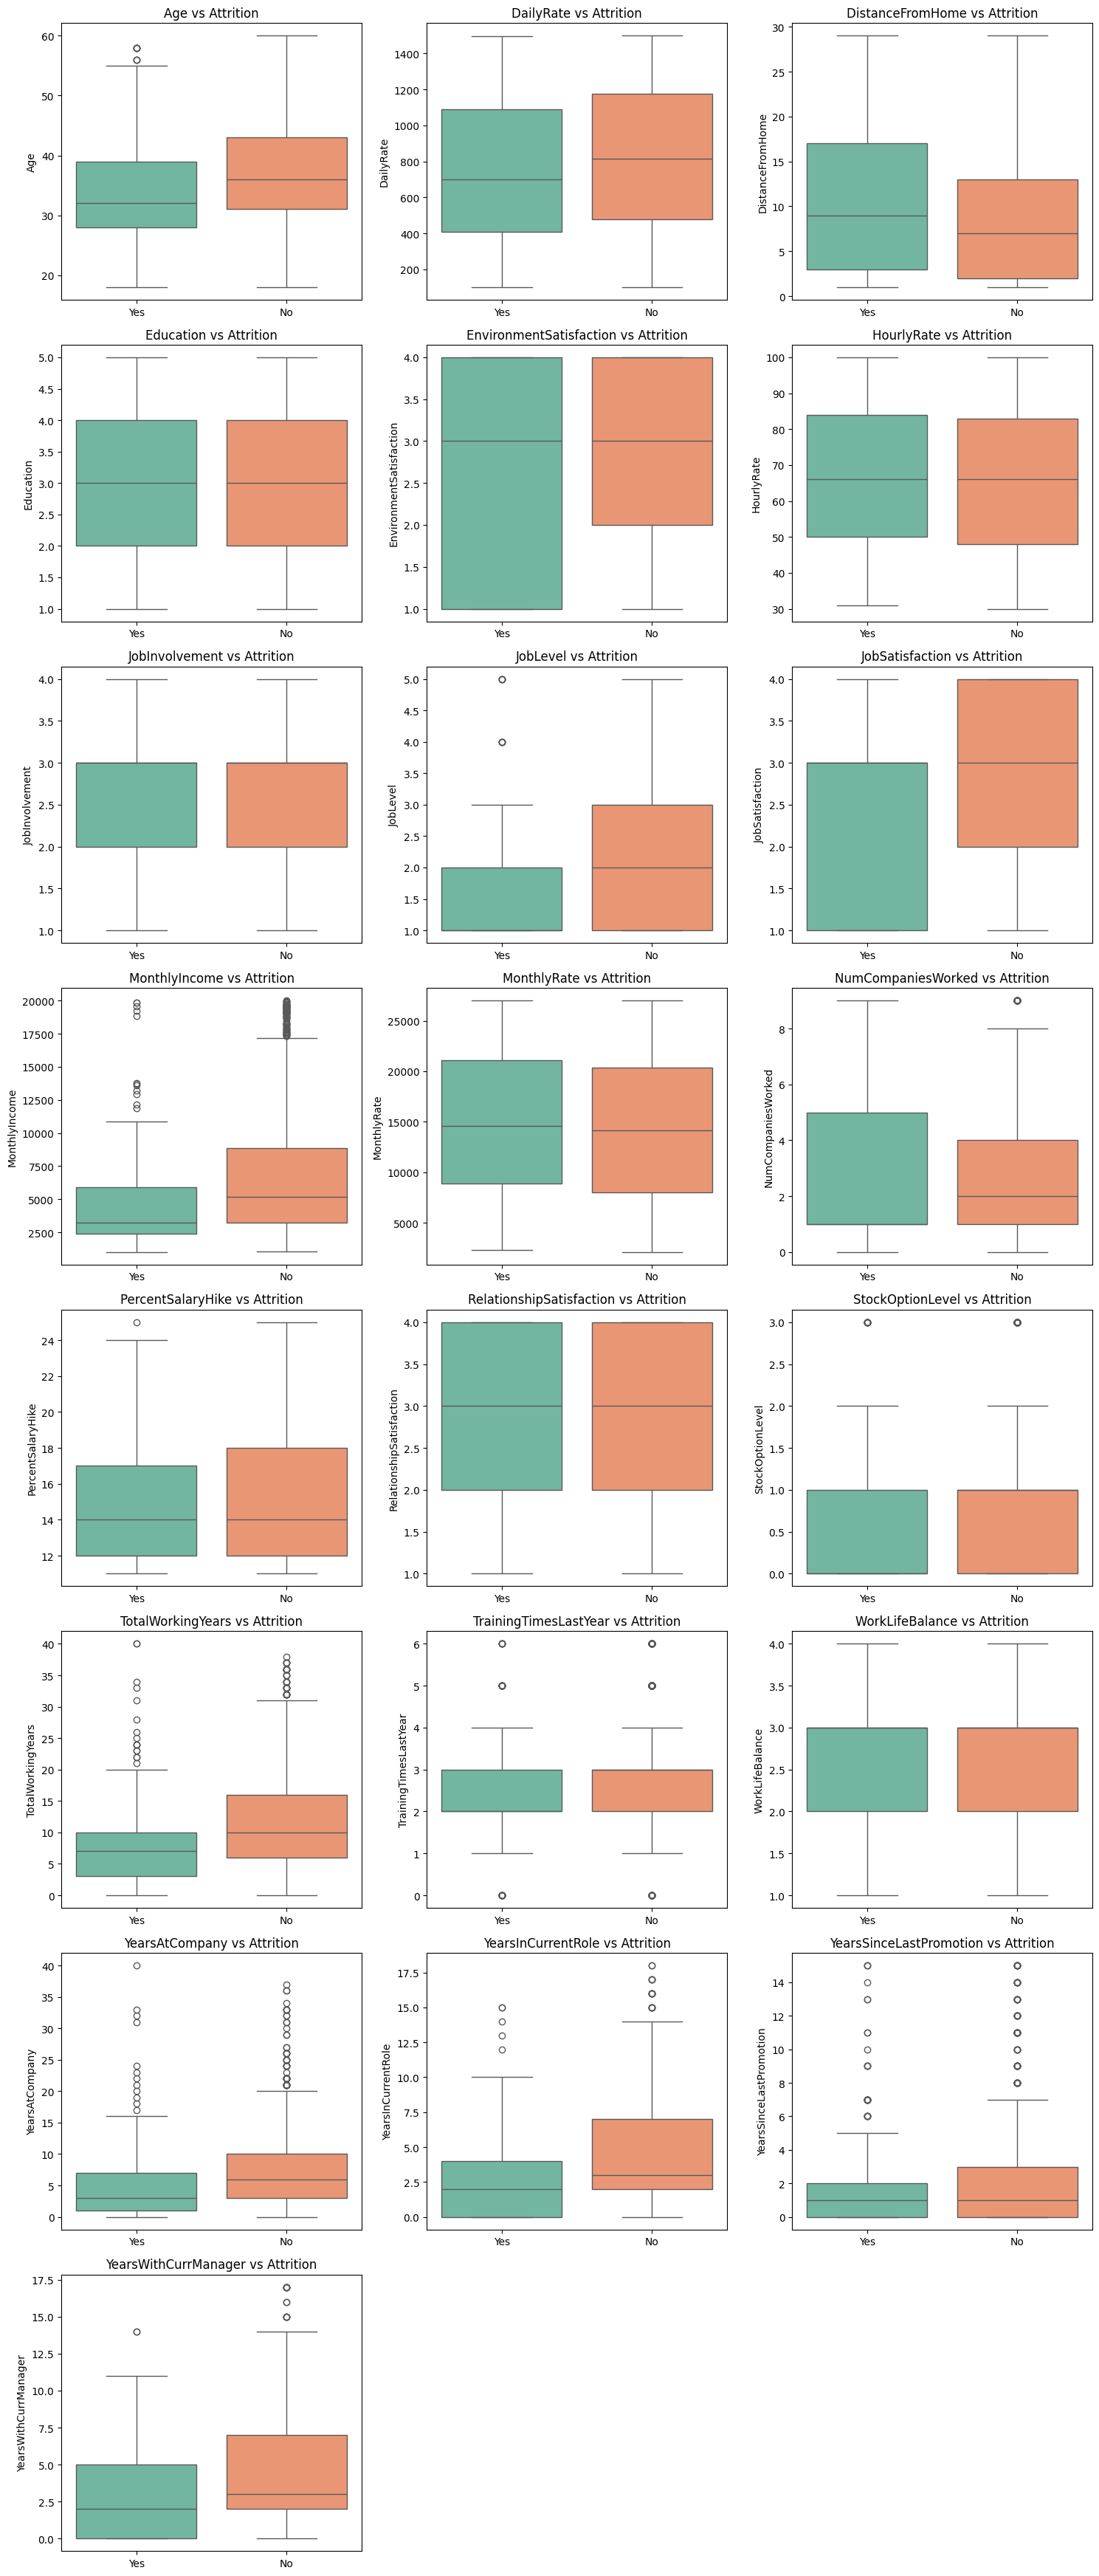

In [ ]:
num_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.drop(['EmployeeNumber', 'EmployeeCount', 'PerformanceRating', 'StandardHours'], errors='ignore')

plt.figure(figsize=(15, 35))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) // 3) + 1, 3, i)
    sns.boxplot(data=dataset,x='Attrition', y=col, palette='Set2', hue='Attrition', legend=False)
    plt.title(f'{col} vs Attrition')
    plt.xlabel('')
plt.tight_layout()
plt.show()

#### Insights Summary Table — Numerical Features vs Attrition

| Feature                     | Observation Summary | Possible Relationship with Attrition |
|-----------------------------|---------------------|---------------------------------------|
| Age                         | Slightly younger median age in "Yes" group | Weak |
| DailyRate                   | Similar distributions across groups | None |
| DistanceFromHome            | Wider spread for "Yes" group | Weak |
| Education                   | Similar medians | None |
| EnvironmentSatisfaction     | Similar medians | None |
| HourlyRate                  | Similar distributions | None |
| JobInvolvement              | Similar medians | None |
| JobLevel                    | Higher levels linked with lower attrition | Moderate |
| JobSatisfaction             | Similar medians | None |
| MonthlyIncome               | Higher income linked with lower attrition | Moderate |
| MonthlyRate                  | Similar distributions | None |
| NumCompaniesWorked          | Slightly higher in "Yes" group | Weak |
| PercentSalaryHike           | Similar medians | None |
| RelationshipSatisfaction    | Similar medians | None |
| StockOptionLevel             | Similar medians | None |
| TotalWorkingYears           | Fewer years in "Yes" group | Weak |
| TrainingTimesLastYear       | Similar medians | None |
| WorkLifeBalance             | Similar medians | None |
| YearsAtCompany              | Shorter tenure in "Yes" group | Strong |
| YearsInCurrentRole          | Shorter role duration in "Yes" group | Strong |
| YearsSinceLastPromotion     | Similar medians; more outliers in "No" group | Weak |
| YearsWithCurrManager        | Shorter time with manager in "Yes" group | Strong |

---

**Legend for Relationship Strength**  
- **Strong**: Clear visual difference in medians or spread, potentially useful for prediction.  
- **Moderate**: Some difference observed, possible predictor but less pronounced.  
- **Weak**: Slight difference, may have limited predictive value.  
- **None**: No visible difference in distribution between groups.


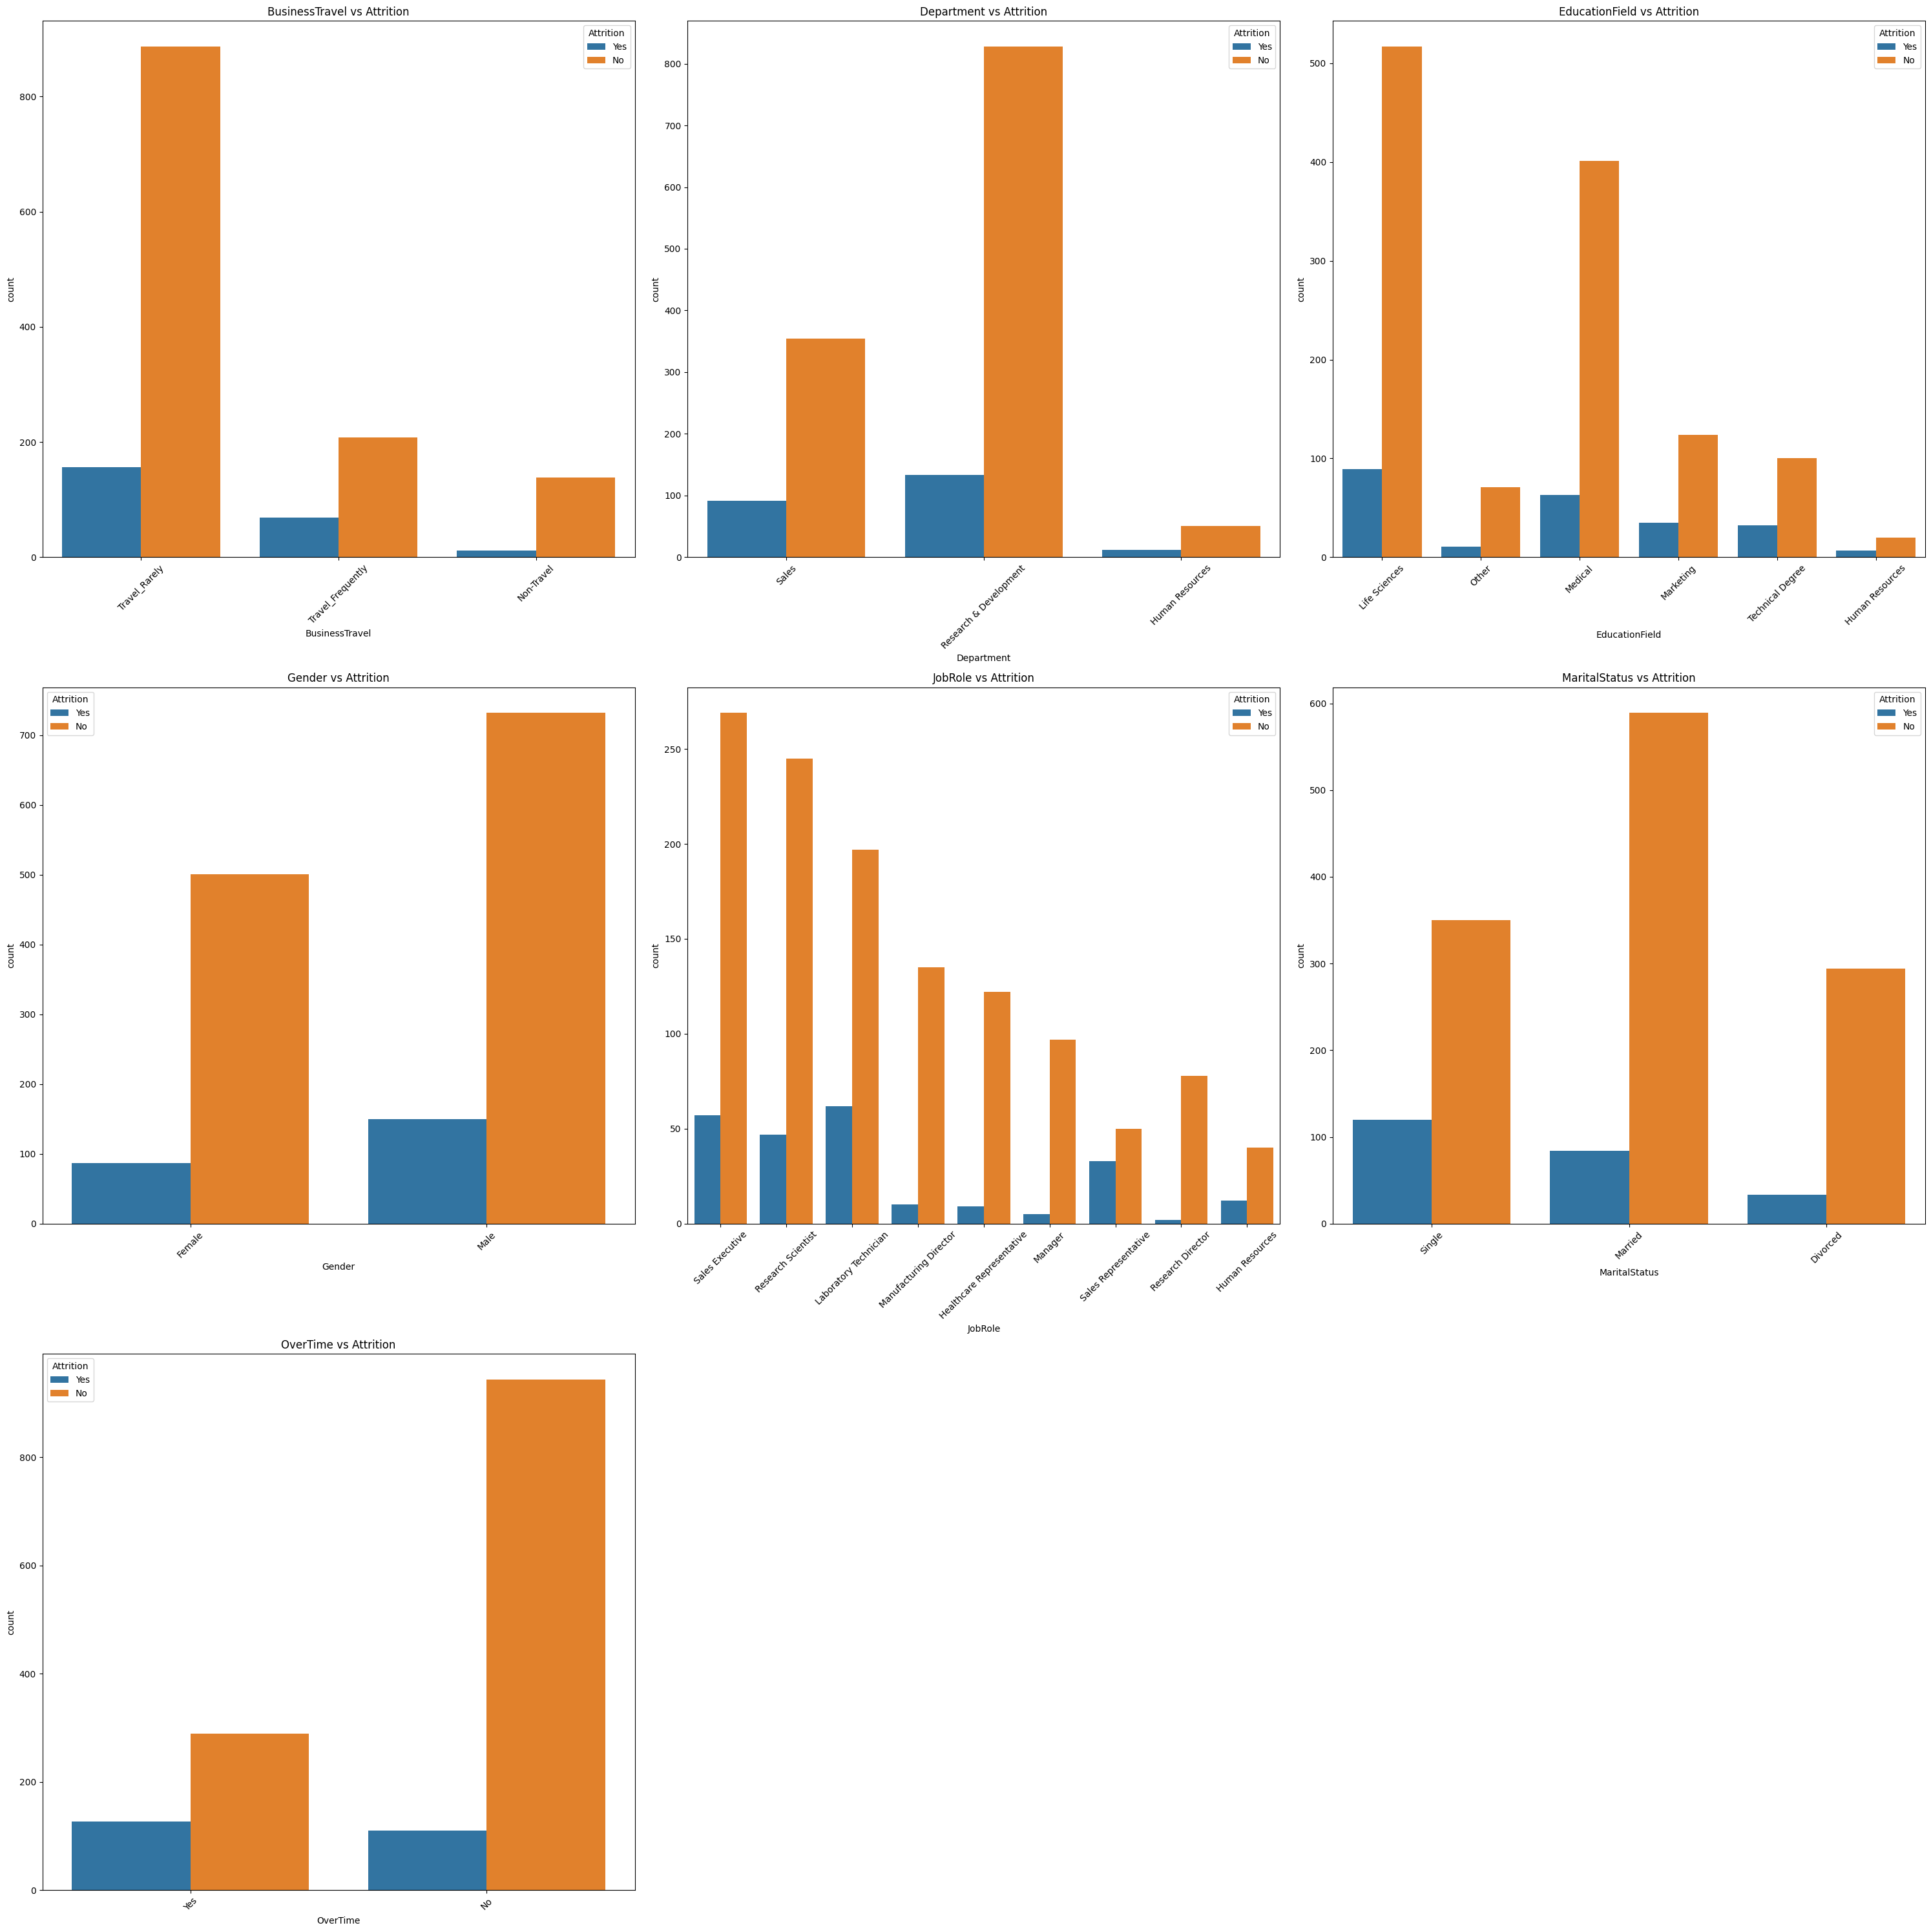

In [ ]:
categorical_cols = ['BusinessTravel', 'Department', 'EducationField','Gender', 'JobRole', 'MaritalStatus', 'OverTime']

n_rows = math.ceil(len(categorical_cols) / 3)
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(30, 10 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=dataset, x=col, hue='Attrition', ax=axes[i])
    axes[i].set_title(f"{col} vs Attrition")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Correlation Analysis
We now check the relationship between numerical variables using correlation heatmap. This helps:
- Identify redundant features (high correlation, rule of thumb: `|correlation| > 0.85` consider dropping one feature).
- Spot variables with potential predictive power for attrition.

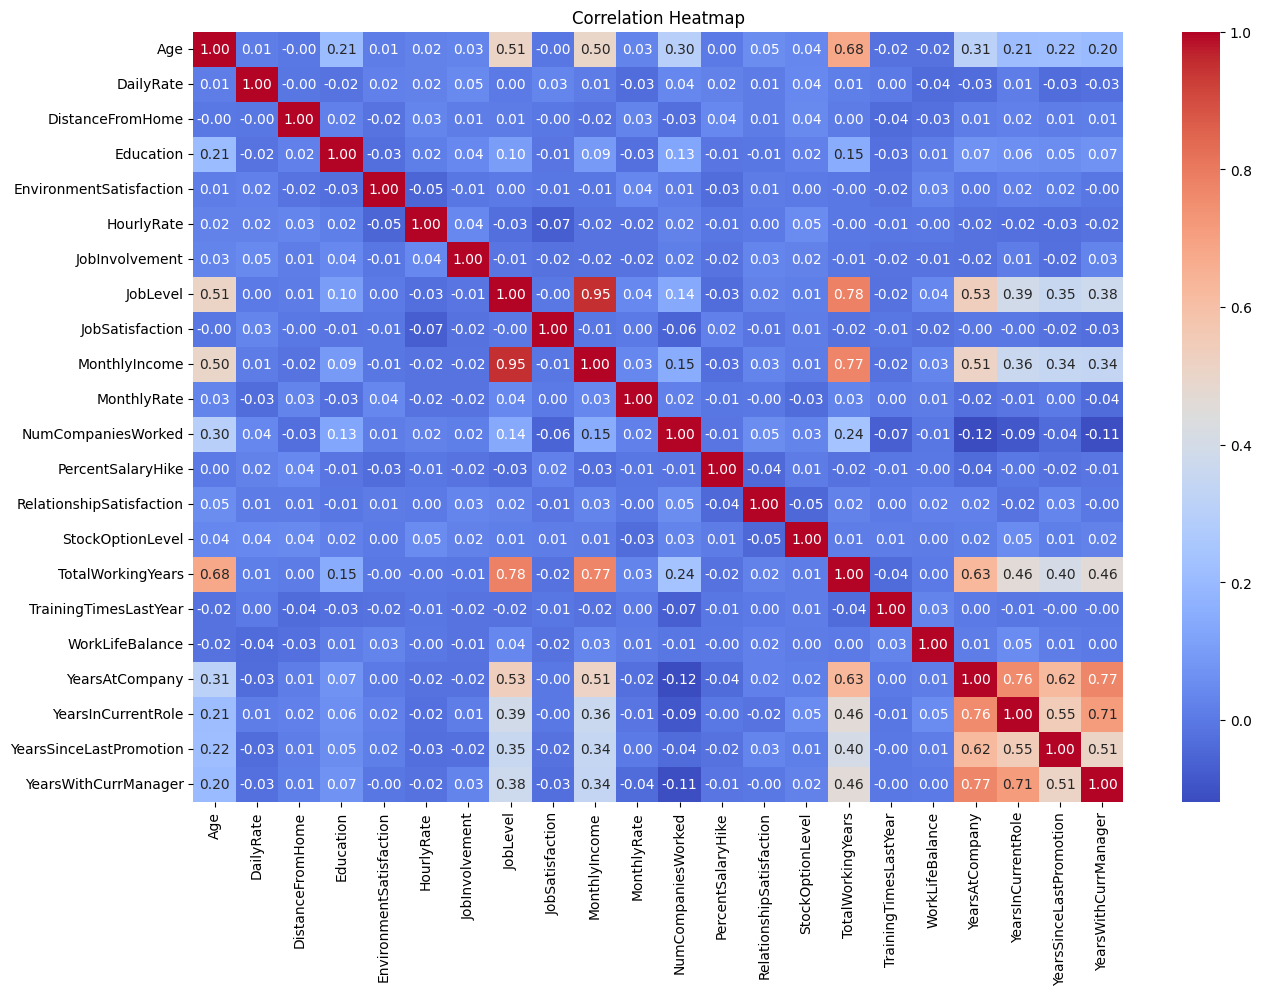

In [ ]:
plt.figure(figsize=(15,10))
corr = dataset[num_cols].corr()
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Data Processing

This section focuses on preparing our dataset by handling **missing values**, **encoding categorical variables**, and **scaling numerical features**.


## Handling Missing Data**  
   - Missing or null values can negatively impact model performance. Thus, we must check if out dataset contains any null values.
   - Depending on the column type and context, missing values will be:
     - Filled using statistical measures (mean, median, mode).
     - Dropped if the percentage of missing data is too high or if the column is irrelevant.

In [ ]:
dataset.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


No **Null Values** thus, we are clear to proceed to the next step of data processing.

## Encoding Categorical Variables
   - Machine learning algorithms cannot directly process categorical data.  
   - We will use:
     - **Label Encoding** for binary categorical features.
     - **One-Hot Encoding** for multi-class categorical features to prevent introducing ordinal relationships where none exist.

In [ ]:
categorical_cols = dataset.select_dtypes(include=['object']).columns.drop('Attrition', errors='ignore')

binary_features = [col for col in categorical_cols if dataset[col].nunique() == 2]
multi_class_features = [col for col in categorical_cols if dataset[col].nunique() > 2]

binary_features, multi_class_features

(['Gender', 'OverTime'],
 ['BusinessTravel',
  'Department',
  'EducationField',
  'JobRole',
  'MaritalStatus'])

### Binary Categorical Features
Binary categorical features contain only two unique values.  
- **Nominal:** Categories without any intrinsic order.  
  Example: *Gender* (Male/Female)  
- **Ordinal:** Categories with a clear ranking. (Not applicable in this dataset's binary columns.)  

We will apply **Label Encoding** to binary nominal features.

| Feature        | Type   | Encoding Method |
|----------------|--------|-----------------|
| Gender         | Nominal | Label Encoding (0/1) |
| OverTime       | Nominal | Label Encoding (0/1) |


In [ ]:
from sklearn.preprocessing import LabelEncoder

binary_nominal = ['Gender', 'OverTime']
dataset_binary_encoded = dataset.copy()

label_encoder = LabelEncoder()
for col in binary_nominal:
    print(f"{col} unique values before encoding: {dataset_binary_encoded[col].unique()}")
    dataset_binary_encoded[col] = label_encoder.fit_transform(dataset_binary_encoded[col])
    print(f"{col} unique values after encoding: {dataset_binary_encoded[col].unique()}\n")

Gender unique values before encoding: ['Female' 'Male']
Gender unique values after encoding: [0 1]

OverTime unique values before encoding: ['Yes' 'No']
OverTime unique values after encoding: [1 0]



### Multi-Class Categorical Features
Multi-class features have more than two distinct categories.  
- **Nominal:** No ranking between categories. Example: *Department*, *JobRole*  
- **Ordinal:** Categories with a natural order. Example: *Education Level*  

For **nominal** features, we use **One-Hot Encoding** to avoid implying order.  
For **ordinal** features, we apply **Ordinal Encoding** using a custom mapping.

| Feature        | Type   | Encoding Method |
|----------------|--------|-----------------|
| BusinessTravel | Nominal | One-Hot Encoding |
| Department     | Nominal | One-Hot Encoding |
| EducationField | Nominal | One-Hot Encoding |
| JobRole        | Nominal | One-Hot Encoding |
| MaritalStatus  | Nominal | One-Hot Encoding |

In [ ]:
multi_nominal = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

dataset_multi_encoded = dataset.copy()
print("Applying One-Hot Encoding for multi-class nominal features...\n")
dataset_multi_encoded = pd.get_dummies(dataset_multi_encoded, columns=multi_nominal, drop_first=True)

dataset_multi_encoded.head()

Applying One-Hot Encoding for multi-class nominal features...



,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,Yes,1102,1,2,1,1,2,Female,94,...,False,False,False,False,False,False,True,False,False,True
1,49,No,279,8,1,1,2,3,Male,61,...,False,False,False,False,False,True,False,False,True,False
2,37,Yes,1373,2,2,1,4,4,Male,92,...,False,True,False,False,False,False,False,False,False,True
3,33,No,1392,3,4,1,5,4,Female,56,...,False,False,False,False,False,True,False,False,True,False
4,27,No,591,2,1,1,7,1,Male,40,...,False,True,False,False,False,False,False,False,True,False


Combining both encoded categorical columns.

In [ ]:
dataset_multi_encoded = pd.get_dummies(dataset_binary_encoded, columns=multi_class_features, drop_first=True)
dataset_multi_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,Yes,1102,1,2,1,1,2,0,94,...,False,False,False,False,False,False,True,False,False,True
1,49,No,279,8,1,1,2,3,1,61,...,False,False,False,False,False,True,False,False,True,False
2,37,Yes,1373,2,2,1,4,4,1,92,...,False,True,False,False,False,False,False,False,False,True
3,33,No,1392,3,4,1,5,4,0,56,...,False,False,False,False,False,True,False,False,True,False
4,27,No,591,2,1,1,7,1,1,40,...,False,True,False,False,False,False,False,False,True,False


# Feature Scaling

Feature scaling is the process of transforming the numerical features of a dataset so that they share a similar scale. This step is important because many machine learning algorithms — such as gradient descent–based models, k-nearest neighbors, and support vector machines — are sensitive to the range of values in the input features. Without scaling, features with larger ranges may dominate the learning process, leading to biased model performance.
In this project, only continuous numerical variables will be scaled. Ordinal variables (such as ratings or ranked survey responses) are excluded from scaling to preserve their discrete and ordered meaning.

## Identifying Continuous vs. Ordinal Numeric Features

The following code block examines all numeric columns in the dataset (after categorical encoding) and separates them into two groups: potential ordinal and potential continuous.

1. **Potential Ordinal**: Columns with a `small number of unique integer values (≤ 10)`. These are <u>**likely categorical features stored as numbers**</u>, such as `satisfaction ratings` or coded `education levels`.

2. **Potential Continuous**: Columns with a `larger range of unique values`, which are typically genuine continuous variables like `Age` or `MonthlyIncome`.

By performing this separation, we ensure that only continuous features are passed to the scaling process, while ordinal features retain their discrete value representation.

In [ ]:
numeric_candidates = dataset_multi_encoded.select_dtypes(include=['int64', 'float64']).columns

potential_ordinal = []
potential_continuous = []

for col in numeric_candidates:
    unique_count = dataset_multi_encoded[col].nunique()
    if unique_count <= 10:
        potential_ordinal.append((col, unique_count))
    else:
        potential_continuous.append((col, unique_count))

print("Potential Ordinal Numeric Columns:")
for col, uniq in potential_ordinal:
    print(f" - {col} ({uniq} unique values)")

print("\nPotential Continuous Columns:")
for col, uniq in potential_continuous:
    print(f" - {col} ({uniq} unique values)")

Potential Ordinal Numeric Columns:
 - Education (5 unique values)
 - EmployeeCount (1 unique values)
 - EnvironmentSatisfaction (4 unique values)
 - Gender (2 unique values)
 - JobInvolvement (4 unique values)
 - JobLevel (5 unique values)
 - JobSatisfaction (4 unique values)
 - NumCompaniesWorked (10 unique values)
 - OverTime (2 unique values)
 - PerformanceRating (2 unique values)
 - RelationshipSatisfaction (4 unique values)
 - StandardHours (1 unique values)
 - StockOptionLevel (4 unique values)
 - TrainingTimesLastYear (7 unique values)
 - WorkLifeBalance (4 unique values)

Potential Continuous Columns:
 - Age (43 unique values)
 - DailyRate (886 unique values)
 - DistanceFromHome (29 unique values)
 - EmployeeNumber (1470 unique values)
 - HourlyRate (71 unique values)
 - MonthlyIncome (1349 unique values)
 - MonthlyRate (1427 unique values)
 - PercentSalaryHike (15 unique values)
 - TotalWorkingYears (40 unique values)
 - YearsAtCompany (37 unique values)
 - YearsInCurrentRole 

In this step, we applied ***Standard Scaling*** to ensure that all continuous numerical features have a mean of 0 and a standard deviation of 1.
This is important because many machine learning algorithms, especially distance-based methods (e.g., KNN, logistic regression, SVM), can be sensitive to differences in feature magnitude. Without scaling, variables with larger numeric ranges can dominate the learning process and skew the model.

In [ ]:
from sklearn.preprocessing import StandardScaler

continuous_cols = [col for col, _ in potential_continuous]

scaler = StandardScaler()
dataset_multi_encoded[continuous_cols] = scaler.fit_transform(dataset_multi_encoded[continuous_cols])

dataset_multi_encoded[continuous_cols].head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,-1.701283,1.383138,-0.108350,0.726020,-1.150554,-0.421642,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-1.699621,-0.240677,-0.291719,1.488876,2.129306,-0.164511,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,-1.696298,1.284725,-0.937654,-1.674841,-0.057267,-0.550208,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,-1.694636,-0.486709,-0.763634,1.243211,-1.150554,-0.421642,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.691313,-1.274014,-0.644858,0.325900,-0.877232,-0.678774,-0.817734,-0.615492,-0.058285,-0.595227


# Data Splitting

Before building any machine learning model, it is essential to split the dataset into separate subsets for training and testing.

Steps Taken:

1. **Encoded the Target Variable**
- The Attrition column contained "Yes" and "No" values.
- Converted to binary representation:
  - `"Yes"` → 1 (employee left)
  - `"No"` → 0 (employee stayed)

2. **Separated Features and Target**
- Features (X): All columns except Attrition
- Target (y): The encoded Attrition column

3. **Train-Test Split**
- Train set: 80% of the data (used for model training)
- Test set: 20% of the data (used for final evaluation)
- Used `stratify=y` to maintain the same proportion of attrition cases in both sets, preventing skewed evaluation results.

In [ ]:
from sklearn.model_selection import train_test_split

processed_dataset = dataset_multi_encoded
processed_dataset = processed_dataset.drop('Over18', axis=1)

processed_dataset['Attrition'] = processed_dataset['Attrition'].map({'Yes': 1, 'No': 0})

X = processed_dataset.drop('Attrition', axis=1)
y = processed_dataset['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Target distribution in train set:\n", y_train.value_counts(normalize=True))

Train set shape: (1176, 47)
Test set shape: (294, 47)
Target distribution in train set:
 Attrition
0    0.838435
1    0.161565
Name: proportion, dtype: float64


## Handling Class Imbalance with SMOTE

The target variable **Attrition** is highly imbalanced, with the majority of employees labeled as "No" (did not leave) and only a small proportion labeled as "Yes" (left the company).  
This imbalance can bias machine learning models toward predicting the majority class, leading to poor performance on the minority class, which is the primary class of interest.

To address this issue, we apply **Synthetic Minority Oversampling Technique (SMOTE)**.  
SMOTE works by creating synthetic examples of the minority class (Attrition = 1) based on its existing feature space, instead of simply duplicating records. This results in a balanced training dataset while preserving the original feature distribution.

**Important:** SMOTE is applied **only to the training set**. The test set remains untouched to ensure the evaluation reflects the real-world distribution of attrition cases.

After applying SMOTE, the training dataset has a balanced distribution of Attrition = 0 and Attrition = 1, which helps the model learn patterns from both classes more effectively.


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training set shape:", y_train.value_counts())
print("Resampled training set shape:", y_train_resampled.value_counts())

Original training set shape: Attrition
0    986
1    190
Name: count, dtype: int64
Resampled training set shape: Attrition
0    986
1    986
Name: count, dtype: int64


# Model Training
For the initial model training we will use `Logistic Regression` using the resampled training data using SMOTE. It is a simple yet powerful baseline model for binary classification problems like attrition (Yes/No). It helps establish a benchmark before trying more complex models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(max_iter=1000, solver='liblinear', verbose=1, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📈 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

[LibLinear]🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       247
           1       0.54      0.47      0.50        47

    accuracy                           0.85       294
   macro avg       0.72      0.70      0.71       294
weighted avg       0.84      0.85      0.85       294


📊 Confusion Matrix:
[[228  19]
 [ 25  22]]

📈 ROC-AUC Score: 0.8135067619950038


In this 2nd round of training we shall use the training set without the SMOTE to see how the model performs with an imbalanced training set. However, in order to compensate the use of imbalanced dataset we shall add the training parameter `class_weight='balanced'`.

In [ ]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', verbose=1, random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📈 ROC-AUC Score:", roc_auc_score(y_test, y_proba))

[LibLinear]🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       247
           1       0.35      0.66      0.46        47

    accuracy                           0.75       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.75      0.78       294


📊 Confusion Matrix:
[[190  57]
 [ 16  31]]

📈 ROC-AUC Score: 0.798862951158584


### Interpretation

- Compared to the SMOTE-based model:
  - **Recall improved** (0.47 → 0.66), meaning we catch more employees who are truly at risk of leaving.  
  - **Precision dropped** (0.54 → 0.35), which means more false alarms (flagging employees as leaving when they actually stay).  
  - **Overall Accuracy dropped** (0.85 → 0.75), but this is expected — accuracy is not the best measure in imbalanced datasets.  
  - **ROC-AUC remains competitive (~0.80)**, close to our SMOTE model.  

---

### Why This Model is Useful

- **Exploratory Context (Why attrition happens?):**  
  If our goal is insight generation, either SMOTE or balanced weights can be used. Both highlight feature importance and allow HR to understand drivers of attrition.  

- **Operational Context (Predicting who may leave):**  
  The **class-weighted logistic regression** is preferable.  
  - HR teams care more about **catching potential leavers (high recall)**, even if it means sometimes flagging employees who stay.  
  - This aligns with real-world decision-making: it is better to investigate more employees than to miss those who truly plan to leave.  

---

✅ **Conclusion:**  
The class-weighted Logistic Regression provides a strong balance between interpretability and predictive power.  
It is a reliable **baseline model** for attrition prediction and sets a reference point for more complex models (Gradient Boosting, XGBoost, etc.).
